In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pImpactR as impact

In [2]:
EmitStr = ['7','14','28']
tunex = 0.86452937
maxTurn = 100
_x = 2
_xSTR = 'Y'
n_particles = 32000

In [3]:
Me = impact.util.Me
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.0003

g = energy/Me
bg = np.sqrt(g**2-1.0)

Emit  = [float(emit)*1.0e-9 for emit in EmitStr]
EmitN = [float(emit)*bg*1.0e-9 for emit in EmitStr]

In [4]:
X=[]
N=[]
nMax=[]
i=0
for i in range(len(EmitStr)):
    nMax.append(int(maxTurn/np.sqrt(EmitN[i])))
    X.append(np.load(_xSTR+'.mid.emit'+EmitStr[i]+'nm.npy')[:int(0.04*nMax[i])])
    N.append(np.arange(len(X[i]))*np.sqrt(EmitN[i]))
    i=i+1

for i in range(len(Emit)):
    X[i]=X[i]*np.exp(-1j*np.angle(X[i][0]))
    
print(nMax)
print([len(X[i]) for i in range(len(Emit))])
print([X[i][0] for i in range(len(Emit))])

[85223, 60261, 42611]
[3408, 2410, 1704]
[(0.0527148964439314+0j), (0.05276590062236565+0j), (0.052755331248695525+0j)]


In [5]:
fftX = []
Tune = []
for i in range(len(EmitStr)):
    fftX.append(np.fft.fft(X[i]))
    Tune.append(np.arange(0,1,1.0/len(X[i])))

# Raw Data

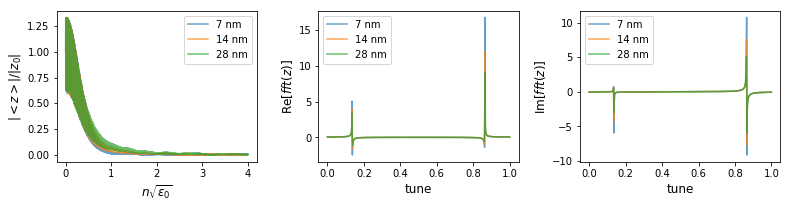

In [6]:
plt.figure(figsize=(11,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i],np.abs(X[i])/np.abs(X[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< z >| / |z_0|$',fontsize=12);
legend = [emit + ' nm' for emit in EmitStr]
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.real(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left( z \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.imag(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left( z \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.mid.png',dpi=180,bbox_inches = "tight")

# dft zoom

In [7]:
nSample = 1024
Tune= []
Amp = []
for i in range(len(Emit)):
    Tune.append(tunex + np.linspace(-50.0,50.0,nSample)*np.sqrt(float(Emit[i])))
    Amp.append(np.zeros(nSample,dtype=np.complex128))
    n=len(X[i])
    for k in range(nSample):
        Amp[i][k] = np.sum(X[i]*np.exp(-1j*2.0*np.pi*Tune[i][k]*np.arange(0,n)))
    Amp[i] = Amp[i]*np.sqrt(float(Emit[i]))*n_particles

pDataInit = impact.readParticleData(-111114,ke,Me,freq)

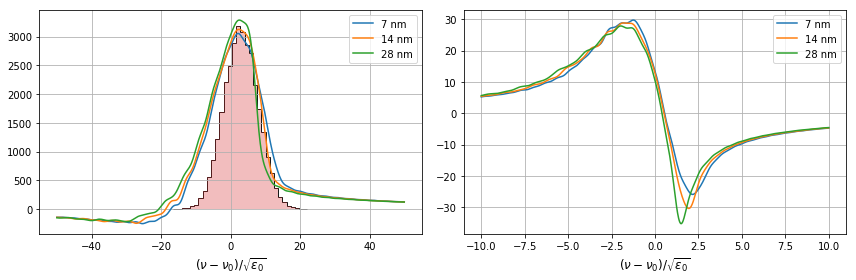

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(np.linspace(-50.0,50.0,nSample),np.real(Amp[i])*6.8e1)
plt.hist((pDataInit[:,_x]-offset+0.0001)*3.0e4,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,_x]-offset+0.0001)*3.0e4,bins=32,alpha=0.3,histtype ='bar');

plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(np.linspace(-10.0,10.0,nSample),np.imag(Amp[i]))

plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.tight_layout()
plt.savefig('dft.mid.v0.png',dpi=180,bbox_inches = "tight")